# RadiX-Net Sparse Deep Neural Networks with Python

This notebook implements RadiX-Net sparse neural network topologies using Python with the pygraphblas library.  RadiX-Net topologies are described in the paper [RadiX-Net: Structured Sparse Matrices for DeepNeural Networks](https://arxiv.org/pdf/1905.00416.pdf) by Ryan A. Robinett and Jeremy Kepner.

In [1]:
from itertools import product, repeat
from pygraphblas import Matrix, lib
from pygraphblas.demo.gviz import draw_graph, draw_layers
from operator import mod, mul, eq
from functools import reduce

# Permutation Matrix

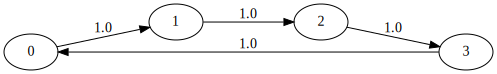

In [2]:

def permutation_matrix(size):
    P = Matrix.from_type(float, size, size)    
    P[size-1,0] = 1.0
    for i in range(size-1):
        P[i,i+1] = 1.0
    return P

draw_graph(permutation_matrix(4)**1)

# Mixed-radix Topologies

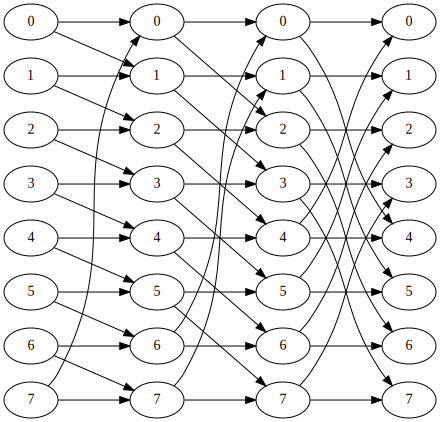

In [3]:

def mixed_topo_radix(topology):
    Nprimes = [reduce(mul, x) for x in topology]
    assert reduce(eq, Nprimes)
    Nprime = Nprimes[0]
    Ws = []
    P = permutation_matrix(Nprime)
    
    for topo in topology:
        pv = 1
        for N in topo:
            W = Matrix.from_type(float, Nprime, Nprime)
            for j in range(N):
                W = W + (P ** (j*pv))
            pv *= N
            Ws.append(W)      
    return Ws

draw_layers(mixed_topo_radix([[2,2,2]]))

# RadiX-Net Construction

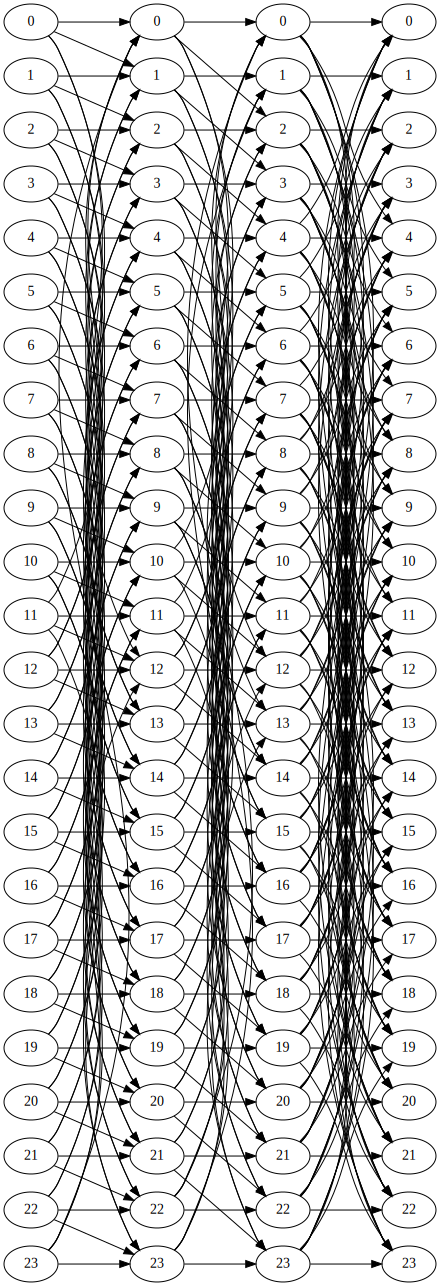

In [4]:
def radixnet(topos, ddnns):
    result = []
    Ws = mixed_topo_radix(topos)
    for w, i in zip(Ws, range(len(ddnns))):
        D = Matrix.from_type(float, ddnns[i], ddnns[i+1])
        D[:,:] = 1.0
        result.append(D.kron(w))
    return result

draw_layers(list(radixnet([[2,2,3]], [2,2,2,2])))                        
        